In [3]:
###linear regression assignement
#IMPORTING LIB.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mlt
from sklearn import metrics

In [4]:
data=pd.read_csv('insurance.csv')

In [5]:
#PERFORMING EDA
data.shape
data.head()
data.tail()
data.columns
data.info()
data.isna()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


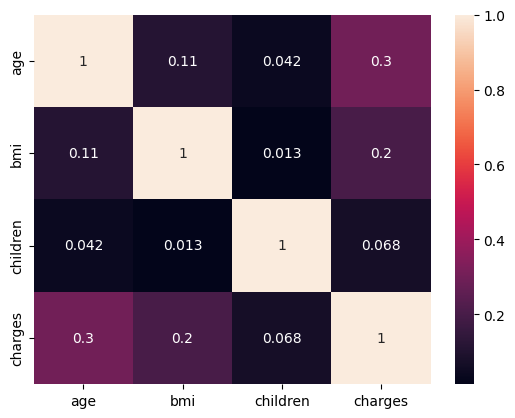

In [6]:
#FINDING CORR()AND PLOTINGT GRARPHS
sns.heatmap(data.loc[:,['age','bmi' ,'children' ,'charges']].corr(),
            annot=True)

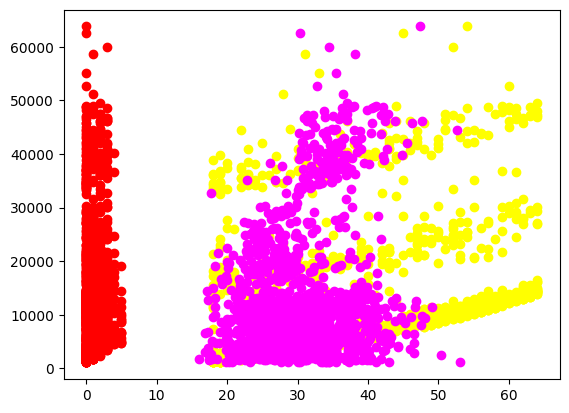

In [16]:
mlt.scatter(x=data['age'],y=data['charges'],color='yellow')
mlt.scatter(x=data['bmi'],y=data['charges'],color='magenta')
mlt.scatter(x=data['children'],y=data['charges'],color='red')

In [7]:
#FINDING UNIQUES VALUE AND TURNING CATEGORICAL COLUMN INTO NUMERICAL COLUMNS
data['sex'].unique()
data['sex'].value_counts()

data['smoker'].unique()
data['smoker'].value_counts()

data['region'].unique()
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['sex']=encoder.fit_transform(data['sex'])
data['smoker']=encoder.fit_transform(data['smoker'])
data['region']=encoder.fit_transform(data['region'])

In [9]:
#SEGREGATING DATA INTO INPUT AND OUTPUT
x=data.drop(['charges'],axis=1)
y=data['charges']

In [11]:
#SPLITING THE DATA INTO TARIN AND TEST
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [13]:
#GIVING TRAING TO THE SYSTEM
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

regressor.fit(x_train,y_train)
regressor.coef_
regressor.intercept_

-11661.983908824377

In [14]:
#TESTING TIME
y_pred=regressor.predict(x_test)
y_pred

array([ 1.10172305e+04,  9.78753017e+03,  3.79947821e+04,  1.61227784e+04,
        6.93075923e+03,  3.96902046e+03,  1.55178430e+03,  1.42832091e+04,
        8.95342886e+03,  7.43194558e+03,  4.54457668e+03,  1.02472753e+04,
        8.65710757e+03,  4.12619770e+03,  2.78113171e+04,  1.10395971e+04,
        1.12514458e+04,  6.03101003e+03,  8.17339252e+03,  2.70394424e+04,
        3.35778484e+04,  1.42670864e+04,  1.16850232e+04,  3.24069403e+04,
        4.41465153e+03,  9.14607182e+03,  1.12786921e+03,  1.00891473e+04,
        4.08782973e+03,  1.03569127e+04,  8.96224058e+03,  4.02452861e+04,
        1.54779185e+04,  1.36671353e+04,  2.47415217e+04,  5.13005676e+03,
        1.28428861e+04,  3.05264017e+04,  3.34289155e+04,  3.48813457e+03,
        4.00215674e+03,  4.27800724e+03,  3.04613664e+04,  3.93491672e+04,
        2.80033682e+04,  5.00299253e+03,  1.09312243e+04,  7.77848493e+03,
        3.60829639e+03,  1.05573586e+04,  5.62958594e+03,  3.37882569e+03,
        3.28476568e+04,  

In [15]:
#QUALITY TESTING
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))
metrics.mean_absolute_error(y_test,y_pred)
metrics.r2_score(y_test,y_pred)
#END OF REPORT

0.7998747145449958